## Demonstration of the ReportFigures module  
* implements requirements from the USGS Illustrations Standards Guide
<http://internal.usgs.gov/publishing/toolboxes/illustrations/standards_guide.pdf>

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from Figures import ReportFigures

%matplotlib inline
rf = ReportFigures()
rf.set_style()

This module needs basemap. If you are using Anaconda, try:
>conda config --add channels conda-forge
then:
>conda install basemap



### make a basic figure  
* tick and axes labels set to Univers 57, size 8
* linewidths set to 0.5

Text(0.5, 0, 'X label')

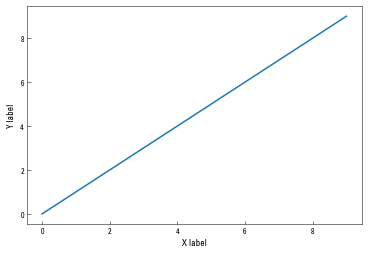

In [2]:
fig, ax = plt.subplots()
ax.plot(range(10))
ax.set_ylabel('Y label')
ax.set_xlabel('X label')

#### much of the functionality in Figures works by modifying the rcParams dictionary.
``ReportFigures.set_style()`` updates the ``rcParams`` dict with values from the ``ReportFigures.plotstyle`` dictionary

In [3]:
rf.plotstyle

{'font.family': 'Univers 57 Condensed',
 'font.size': 8.0,
 'axes.linewidth': 0.5,
 'axes.labelsize': 9,
 'axes.titlesize': 9,
 'grid.linewidth': 0.5,
 'xtick.major.width': 0.5,
 'ytick.major.width': 0.5,
 'xtick.minor.width': 0.5,
 'ytick.minor.width': 0.5,
 'xtick.labelsize': 8,
 'ytick.labelsize': 8,
 'xtick.direction': 'in',
 'ytick.direction': 'in',
 'xtick.major.pad': 3,
 'ytick.major.pad': 3,
 'axes.edgecolor': 'k',
 'pdf.fonttype': 42,
 'ps.fonttype': 42,
 'figure.figsize': (7.0, 5.25)}

``set_style()`` also sets default dimensions, depending on whether a two-column (double) or single-column figure width is desired

In [4]:
rf.doublecolumn_sizeT

(7.0, 6.125)

In [5]:
rf.set_style(width='double', height='tall')

In [6]:
help(rf.set_style)

Help on method set_style in module Figures.report_figs:

set_style(mpl=<module 'matplotlib' from '/Users/aleaf/anaconda3/envs/gis/lib/python3.6/site-packages/matplotlib/__init__.py'>, style='default', width='double', height='default') method of Figures.report_figs.ReportFigures instance
    Set dimmensions of figures to standard report sizes
    
    Parameters
    ----------
    width : string
        Sets the figure width to single or double column
        'double' (default) or 'single'
    height : string
        Sets the aspect of the plot to the Matplotlib default (6:8), or a tall aspect (7:8)
        'default' (default) or 'tall'



### Add a legend

In [7]:
help(ReportFigures.legend)

Help on function legend in module Figures.report_figs:

legend(self, ax, handles, labels, **kwargs)
    Make a legend, following guidelines in USGS Illustration Standards, p. 14
    
    ax : matplotlib.pyplot axis object
    handles : list
        matplotlib.pyplot handles for each plot
    labels : list
        labels for each plot
    kwargs : dict
        keyword arguments to matplotlib.pyplot.legend()



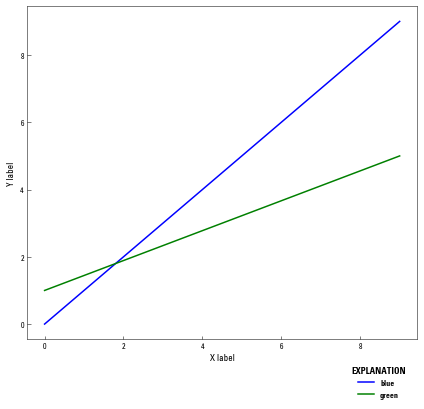

In [8]:
fig, ax = plt.subplots()
ax.plot(range(10), color='b', label='blue')
ax.plot(range(10), np.linspace(1, 5, 10), color='g', label='green')
ax.set_ylabel('Y label')
ax.set_xlabel('X label')
handles, labels = ax.get_legend_handles_labels()
rf.legend(ax, handles, labels, bbox_to_anchor=(.9, -0.2))

## subplot titles and axes numbering

In [9]:
help(rf.axes_numbering)

Help on method axes_numbering in module Figures.report_figs:

axes_numbering(ax, format_x=False, enforce_integers=False, x_fmt=None, y_fmt=None) method of Figures.report_figs.ReportFigures instance
    Implement these requirements from
    Standards for U.S. Geological Survey Page-Size Illustrations, p 36
    * Use commas in numbers greater than 999
    * Label zero without a decimal point
    * Numbers less than 1 should consist of a zero, a decimal point, and the number
    * Numbers greater than or equal to 1 need a decimal point and trailing zero only where significant figures dictate
    
    Parameters
    ----------
    ax : matplotlib axes object
    format_x : bool
        Option to format the x-axis (for figures where x-axis is dates or categories, etc.)
    enforce_integers : bool
        Force tick intervals to be at even integers
    x_fmt : format string
        Optional argument to explicitly specify desired axis formatting.
        (e.g. {:,.2f} for two decimal places w

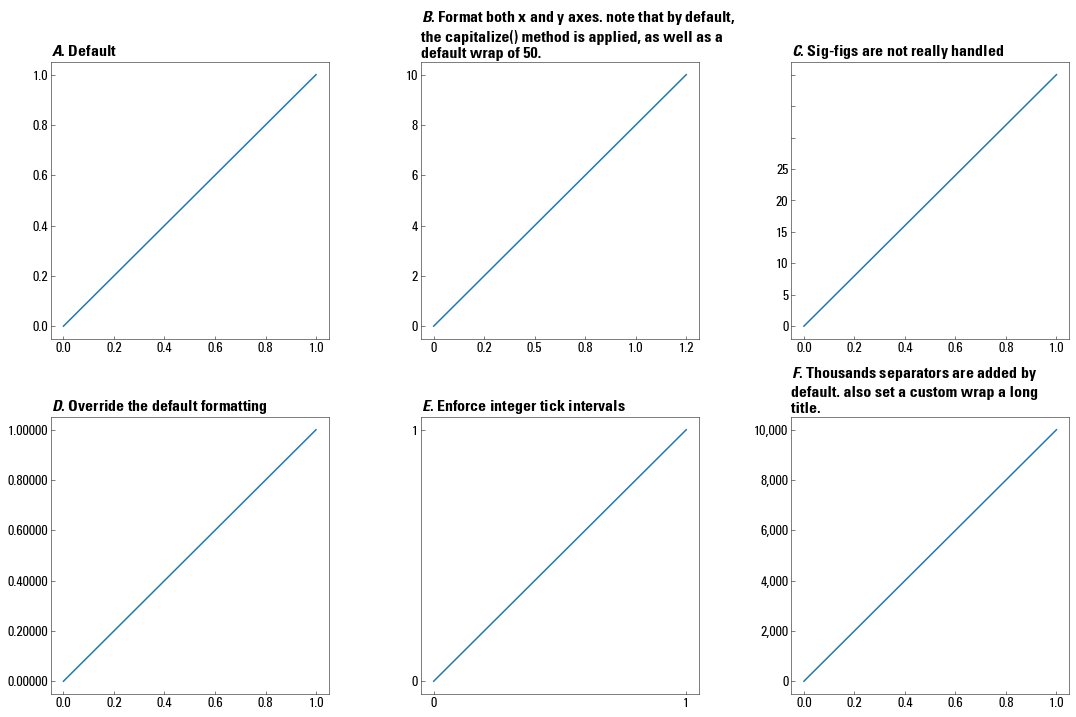

In [10]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flat
axes[0].plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
axes[1].plot(np.linspace(0, 1, 10), np.linspace(0, 10, 10))
axes[2].plot(np.linspace(0, 1, 10), np.linspace(0, 20, 10))
axes[3].plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
axes[4].plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
axes[5].plot(np.linspace(0, 1, 10), np.linspace(0, 1e4, 10))

rf.title(axes[0], 'default', subplot_prefix='A')

rf.axes_numbering(axes[1], format_x=True)
rf.title(axes[1], 'fOrMaT both x and y axes. Note that by default, the capitalize() method is applied, as well as a default wrap of 50.', subplot_prefix='B')

rf.axes_numbering(axes[2])
rf.title(axes[2], 'sig-figs are not really handled', subplot_prefix='C')

rf.axes_numbering(axes[3], y_fmt='{:.5f}')
rf.title(axes[3], 'override the default formatting', subplot_prefix='D')

rf.axes_numbering(axes[4], enforce_integers=True, format_x=True)
rf.title(axes[4], 'enforce integer tick intervals', subplot_prefix='E')

rf.axes_numbering(axes[5])
rf.title(axes[5], 'thousands separators are added by default. Also set a custom wrap a long title.', 
         subplot_prefix='F', wrap=40)

plt.tight_layout()

### reset the fonts

In [11]:
rf.set_style()